In [47]:
# Packages:

import requests
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [59]:
import requests
import pandas as pd
from datetime import datetime, timedelta

# Define the list of API endpoints
api_endpoints = ['CME', 'CMEAnalysis', 'GST', 'IPS', 'FLR', 'SEP', 'MPC', 'RBE', 'HSS']

# Define the common API parameters
api_key = 'BkLnefy3MaYDPAsNO1vUZxXTepcIjKWPdZzfW2UY'  # Replace with your NASA API key

# Calculate the start and end dates for the last 365 days
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Convert dates to the required format (YYYY-MM-DD)
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

# Create an empty dictionary to store the DataFrame objects
data_frames = {}

# Iterate over the API endpoints and import data into DataFrame objects
for endpoint in api_endpoints:
    # Define the API URL with the updated start and end dates
    url = f'https://api.nasa.gov/DONKI/{endpoint}'
    params = {
        'startDate': start_date_str,
        'endDate': end_date_str,
        'api_key': api_key
    }
    
    # Send GET request to the API
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        try:
            # Parse the response as JSON
            data = response.json()
            
            # Convert the data into a DataFrame
            df = pd.DataFrame(data)
            
            # Store the DataFrame in the dictionary
            data_frames[endpoint] = df
        except ValueError as e:
            print(f'Error parsing JSON for endpoint {endpoint}:', e)
    else:
        print(f'Error for endpoint {endpoint}:', response.status_code)



In [60]:
for endpoint, df in data_frames.items():
    print(f"Data for endpoint: {endpoint}")
    print(df.head())
    print("\n")

Data for endpoint: CME
                    activityID      catalog          startTime sourceLocation  \
0  2022-07-31T01:25:00-CME-001  M2M_CATALOG  2022-07-31T01:25Z                  
1  2022-07-31T02:00:00-CME-001  M2M_CATALOG  2022-07-31T02:00Z                  
2  2022-07-31T06:48:00-CME-001  M2M_CATALOG  2022-07-31T06:48Z                  
3  2022-07-31T19:48:00-CME-001  M2M_CATALOG  2022-07-31T19:48Z                  
4  2022-07-31T23:12:00-CME-001  M2M_CATALOG  2022-07-31T23:12Z         N15E95   

   activeRegionNum                                               link  \
0              NaN  https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...   
1              NaN  https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...   
2              NaN  https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...   
3              NaN  https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...   
4              NaN  https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...   

                                                not

In [65]:
# Define the list of API endpoints
api_endpoints = ['CME', 'CMEAnalysis', 'GST', 'IPS', 'FLR', 'SEP', 'MPC', 'RBE', 'HSS']
                
# Define the common API parameters
api_key = 'BkLnefy3MaYDPAsNO1vUZxXTepcIjKWPdZzfW2UY'

# Calculate the start and end dates for the last 365 days
end_date = datetime.now()
start_date = end_date - timedelta(days=7)

# Convert dates to the required format (YYYY-MM-DD)
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')

# Create an empty dictionary to store the DataFrame objects
df_7 = {}

# Iterate over the API endpoints and import data into DataFrame objects
for endpoint in api_endpoints:
    # Define the API URL with the updated start and end dates
    url = f'https://api.nasa.gov/DONKI/{endpoint}'
    params = {
        'startDate': start_date_str,
        'endDate': end_date_str,
        'api_key': api_key
    }
    
    # Send GET request to the API
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        try:
            # Parse the response as JSON
            data = response.json()
            
            # Convert the data into a DataFrame
            df = pd.DataFrame(data)
            
            # Store the DataFrame in the dictionary
            df_7[endpoint] = df
        except ValueError as e:
            print(f'Error parsing JSON for endpoint {endpoint}:', e)
    else:
        print(f'Error for endpoint {endpoint}:', response.status_code)


Error parsing JSON for endpoint GST: Expecting value: line 1 column 1 (char 0)
Error parsing JSON for endpoint MPC: Expecting value: line 1 column 1 (char 0)


In [70]:
flr_df

,flrID,instruments,beginTime,peakTime,endTime,classType,sourceLocation,activeRegionNum,linkedEvents,link,duration
0,2022-01-01T07:07:00-FLR-001,[{'displayName': 'GOES-P: EXIS 1.0-8.0'}],2022-01-01 07:07:00+00:00,2022-01-01T07:30Z,2022-01-01 07:42:00+00:00,M1.1,N22W76,12918.0,None,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,35.0
1,2022-01-12T04:13:00-FLR-001,[{'displayName': 'GOES-P: EXIS 1.0-8.0'}],2022-01-12 04:13:00+00:00,2022-01-12T04:23Z,2022-01-12 04:27:00+00:00,B7.2,N30E110,NaN,[{'activityID': '2022-01-12T04:36:00-CME-001'}],https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,14.0
2,2022-01-13T20:24:00-FLR-001,[{'displayName': 'GOES-P: EXIS 1.0-8.0'}],2022-01-13 20:24:00+00:00,2022-01-13T20:33Z,2022-01-13 20:38:00+00:00,C1.3,N30E95,NaN,[{'activityID': '2022-01-13T21:09:00-CME-001'}],https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,14.0
3,2022-01-14T01:47:00-FLR-001,[{'displayName': 'GOES-P: EXIS 1.0-8.0'}],2022-01-14 01:47:00+00:00,2022-01-14T02:03Z,2022-01-14 02:14:00+00:00,M1.8,N30E95,12932.0,[{'activityID': '2022-01-14T03:05:00-CME-001'}],https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,27.0
4,2022-01-14T13:07:00-FLR-001,[{'displayName': 'GOES-P: EXIS 1.0-8.0'}],2022-01-14 13:07:00+00:00,2022-01-14T13:34Z,2022-01-14 14:16:00+00:00,C4.3,S33W40,12925.0,[{'activityID': '2022-01-14T13:38:00-CME-001'}],https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,69.0
...,...,...,...,...,...,...,...,...,...,...,...
299,2022-12-29T18:11:00-FLR-001,[{'displayName': 'GOES-P: EXIS 1.0-8.0'}],2022-12-29 18:11:00+00:00,2022-12-29T18:20Z,2022-12-29 18:26:00+00:00,M2.1,N20E90,13180.0,None,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,15.0
300,2022-12-29T18:26:00-FLR-001,[{'displayName': 'GOES-P: EXIS 1.0-8.0'}],2022-12-29 18:26:00+00:00,2022-12-29T18:33Z,2022-12-29 18:43:00+00:00,M2.4,N20E90,13180.0,None,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,17.0
301,2022-12-30T11:03:00-FLR-001,[{'displayName': 'GOES-P: EXIS 1.0-8.0'}],2022-12-30 11:03:00+00:00,2022-12-30T11:14Z,2022-12-30 11:23:00+00:00,C9.6,N20E88,13180.0,None,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,20.0
302,2022-12-30T15:24:00-FLR-001,[{'displayName': 'GOES-P: EXIS 1.0-8.0'}],2022-12-30 15:24:00+00:00,2022-12-30T15:28Z,2022-12-30 15:32:00+00:00,M1.4,N18E08,13176.0,[{'activityID': '2022-12-30T16:53:00-CME-001'}],https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,8.0


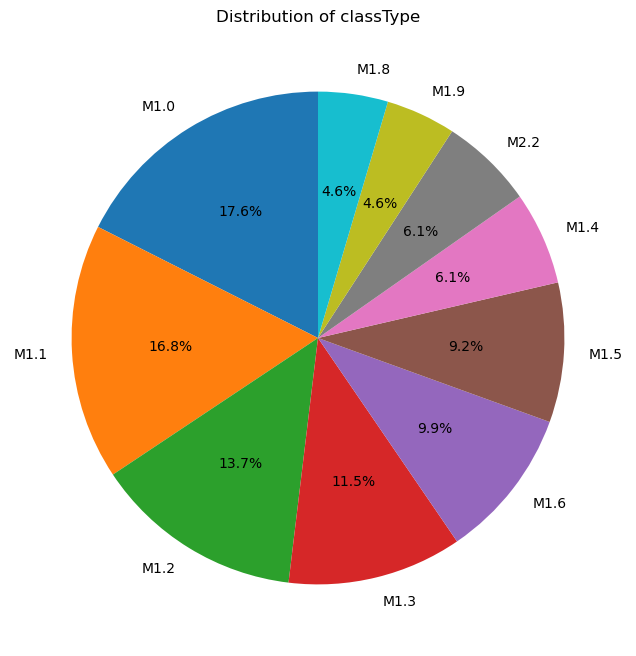

In [74]:
class_type_counts = flr_df['classType'].value_counts().nlargest(10)
import matplotlib.pyplot as plt

# Plot the pie chart
plt.figure(figsize=(8, 8))  # Set the size of the figure (optional)

# Create the pie chart
plt.pie(class_type_counts, labels=class_type_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title to the pie chart
plt.title("Distribution of classType")

# Display the pie chart
plt.show()

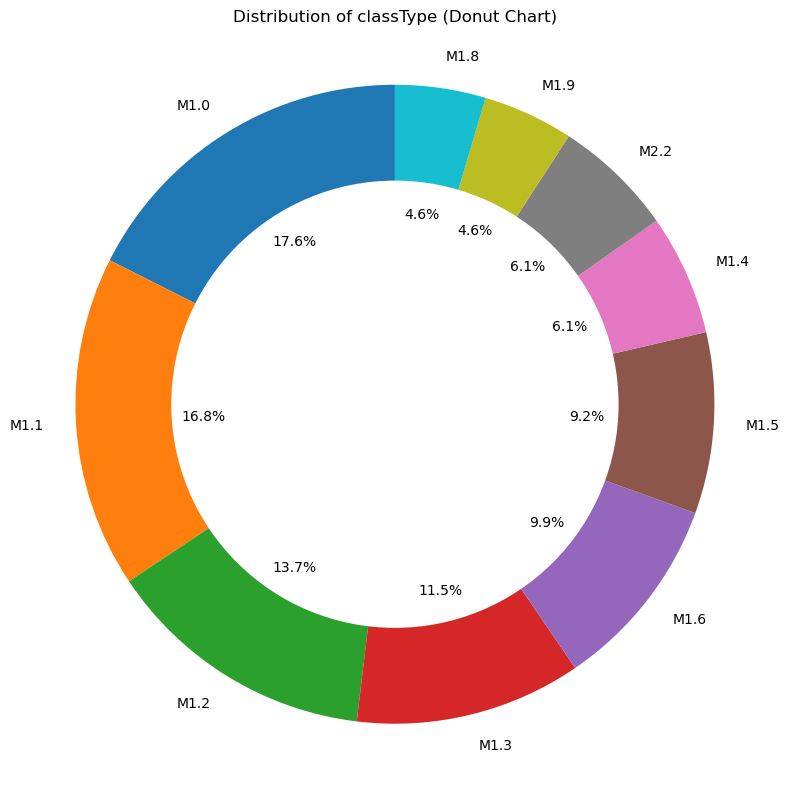

In [80]:
import matplotlib.pyplot as plt

# Assuming you have class_type_counts
class_type_counts = flr_df['classType'].value_counts().nlargest(10)

# Plot the donut chart
plt.figure(figsize=(8, 8))  # Set the size of the figure (optional)

# Create the pie chart
plt.pie(class_type_counts, labels=class_type_counts.index, autopct='%1.1f%%', startangle=90)

# Draw a white circle at the center to create the donut effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title to the donut chart
plt.title("Distribution of classType (Donut Chart)")

# Display the donut chart
plt.axis('equal')
plt.tight_layout()
plt.show()


In [98]:
cme_df = data_frames['CMEAnalysis']
cme_df

,time21_5,latitude,longitude,halfAngle,speed,type,isMostAccurate,associatedCMEID,note,catalog,link,time21_5_interval
0,2022-07-31 04:58:00+00:00,-2.0,122.0,11.0,832.0,C,True,2022-07-31T01:25:00-CME-001,The CME leading edge becomes diffuse in later ...,M2M_CATALOG,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2022-07-25
1,2022-07-31 15:16:00+00:00,-60.0,-163.0,20.0,258.0,S,True,2022-07-31T02:00:00-CME-001,This measurement tracks the shock front portio...,M2M_CATALOG,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2022-07-25
2,2022-07-31 16:31:00+00:00,59.0,114.0,45.0,367.0,S,True,2022-07-31T06:48:00-CME-001,This measurement follows the outermost shock f...,M2M_CATALOG,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2022-07-25
3,2022-08-01 02:33:00+00:00,-38.0,-124.0,14.0,531.0,C,True,2022-07-31T19:48:00-CME-001,There is a data gap in STEREO A COR2 from 2022...,M2M_CATALOG,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2022-08-01
4,2022-08-01 02:20:00+00:00,16.0,-95.0,29.0,1038.0,O,True,2022-07-31T23:12:00-CME-001,This measurement is based on the approximate s...,M2M_CATALOG,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2022-08-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2023-07-28 04:43:00+00:00,-25.0,-75.0,31.0,590.0,C,True,2023-07-27T23:24:00-CME-001,Uncertain analysis since this CME overlaps wit...,M2M_CATALOG,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2023-07-24
1093,2023-07-28 17:35:00+00:00,40.0,110.0,43.0,2000.0,R,True,2023-07-28T15:53:00-CME-001,,M2M_CATALOG,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2023-07-24
1094,2023-07-29 04:38:00+00:00,-3.0,-27.0,42.0,589.0,C,True,2023-07-28T22:36:00-CME-001,Longitude is based on where the eruption was c...,M2M_CATALOG,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2023-07-24
1095,2023-07-29 14:07:00+00:00,9.0,-88.0,32.0,526.0,C,True,2023-07-29T07:53:00-CME-001,Longitude based on location of flare and erupt...,M2M_CATALOG,https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...,2023-07-24


In [105]:
import pandas as pd

# Assuming cme_df is your DataFrame and time21_5 column is already converted to datetime format
cme_df['time21_5'] = pd.to_datetime(cme_df['time21_5'])

# Group the data by the interval of 52 weeks and calculate the weekly averages
cme_df['time21_5_interval'] = cme_df['time21_5'].dt.to_period('W').dt.start_time
weekly_averages = cme_df.groupby('time21_5_interval').agg({
    'time21_5': 'first',  # Use the first occurrence of time21_5 in the week
    'speed': 'mean',
    'halfAngle': 'mean',
    'latitude': 'mean',
    'longitude': 'mean',
    'type': lambda x: x.value_counts().index[0],  # Most frequent type in the week
    'isMostAccurate': 'any',  # Any value is True if at least one is True
    'associatedCMEID': lambda x: ', '.join(x),  # Combine IDs with comma if there are multiple
    'note': lambda x: x.iloc[0],  # Take the first note in the week
    'catalog': lambda x: x.iloc[0],  # Take the first catalog link in the week
    'link': lambda x: x.iloc[0]  # Take the first link in the week
}).reset_index()

# Drop the unnecessary column
weekly_averages.drop(columns=['time21_5_interval'], inplace=True)

# Display the modified DataFrame with 52 rows, each representing a week
print(weekly_averages)


                    time21_5       speed  halfAngle   latitude  longitude  \
0  2022-07-31 04:58:00+00:00  485.666667  25.333333  -1.000000  24.333333   
1  2022-08-01 02:33:00+00:00  553.111111  23.555556  -4.055556 -16.222222   
2  2022-08-08 14:53:00+00:00  516.571429  19.857143  -3.928571 -32.785714   
3  2022-08-15 07:20:00+00:00  666.176471  31.411765 -22.000000  21.411765   
4  2022-08-22 12:54:00+00:00  537.736842  26.000000 -12.526316  49.157895   
5  2022-08-29 10:00:00+00:00  743.285714  22.095238 -21.761905  46.333333   
6  2022-09-05 03:50:00+00:00  511.714286  27.214286  -4.071429  -9.357143   
7  2022-09-15 16:29:00+00:00  517.333333  32.833333  -3.666667  55.666667   
8  2022-09-19 12:06:00+00:00  612.714286  29.428571  -3.785714  -2.785714   
9  2022-09-26 14:28:00+00:00  628.650000  22.350000  12.300000  21.300000   
10 2022-10-03 09:34:00+00:00  572.187500  32.125000   6.062500  -5.312500   
11 2022-10-10 10:56:00+00:00  467.625000  28.062500   3.937500  25.812500   

/var/folders/2d/t3sfrb_s42s3k5vrqthc4ybc0000gp/T/ipykernel_47070/2547168866.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  cme_df['time21_5_interval'] = cme_df['time21_5'].dt.to_period('W').dt.start_time


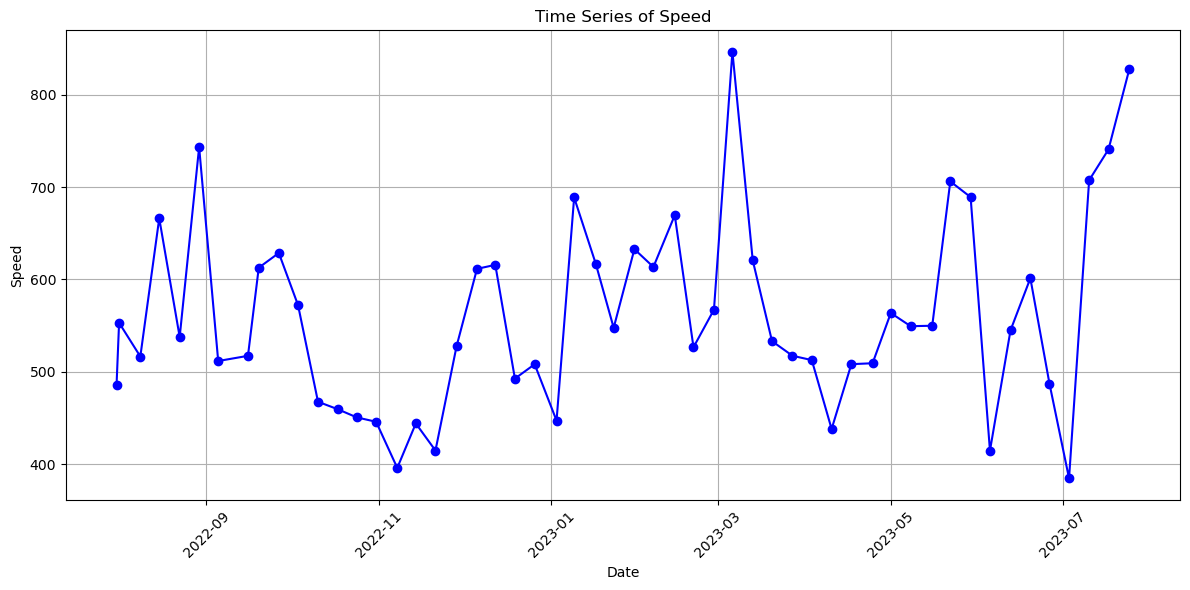

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_averages DataFrame has been created from the previous step

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(weekly_averages['time21_5'], weekly_averages['speed'], marker='o', linestyle='-', color='b')
plt.xlabel('Date')
plt.ylabel('Speed')
plt.title('Time Series of Speed')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


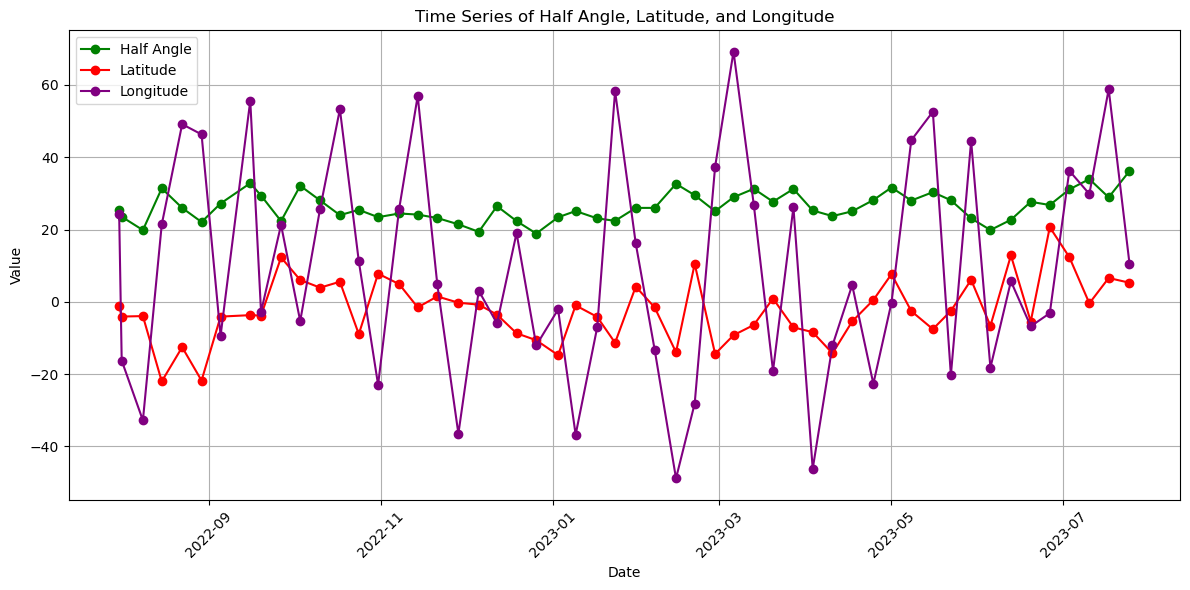

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming weekly_averages DataFrame has been created from the previous step

# Plot the time series for halfAngle, latitude, and longitude
plt.figure(figsize=(12, 6))
plt.plot(weekly_averages['time21_5'], weekly_averages['halfAngle'], marker='o', linestyle='-', color='g', label='Half Angle')
plt.plot(weekly_averages['time21_5'], weekly_averages['latitude'], marker='o', linestyle='-', color='r', label='Latitude')
plt.plot(weekly_averages['time21_5'], weekly_averages['longitude'], marker='o', linestyle='-', color='purple', label='Longitude')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series of Half Angle, Latitude, and Longitude')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


In [63]:
# Convert the DataFrame timestamps to datetime objects
for endpoint, df in data_frames.items():
    if 'time' in df.columns:
        df['time'] = pd.to_datetime(df['time'])
    else:
        print(f"Warning: 'time' column not found in DataFrame for endpoint {endpoint}")

# Calculate the start and end dates for the last 30 days and last 7 days
end_date = datetime.now()
last_30_days_start = end_date - timedelta(days=30)
last_7_days_start = end_date - timedelta(days=7)

# Filter the DataFrames for the last 30 days
data_frames_last_30_days = {}
for endpoint, df in data_frames.items():
    if 'time' in df.columns:
        mask = (df['time'] >= last_30_days_start) & (df['time'] <= end_date)
        data_frames_last_30_days[endpoint] = df.loc[mask]
    else:
        print(f"Warning: 'time' column not found in DataFrame for endpoint {endpoint}")

# Filter the DataFrames for the last 7 days
data_frames_last_7_days = {}
for endpoint, df in data_frames.items():
    if 'time' in df.columns:
        mask = (df['time'] >= last_7_days_start) & (df['time'] <= end_date)
        data_frames_last_7_days[endpoint] = df.loc[mask]
    else:
        print(f"Warning: 'time' column not found in DataFrame for endpoint {endpoint}")


In [53]:
# Download all data from the DONKI API endpoint

# Define the list of API endpoints
api_endpoints = ['CME', 'CMEAnalysis', 'GST', 'IPS', 'FLR', 'SEP', 'MPC', 'RBE', 'HSS']

# Define the common API parameters
params = {
    'startDate': '2022-01-01',
    'endDate': '2022-12-31',
    'api_key': 'BkLnefy3MaYDPAsNO1vUZxXTepcIjKWPdZzfW2UY'  # Replace with your NASA API key
}

# Create an empty dictionary to store the DataFrame objects
data_frames = {}

# Iterate over the API endpoints and import data into DataFrame objects
for endpoint in api_endpoints:
    # Define the API URL
    url = f'https://api.nasa.gov/DONKI/{endpoint}'
    
    # Send GET request to the API
    response = requests.get(url, params=params)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the response as JSON
        data = response.json()
        
        # Convert the data into a DataFrame
        df = pd.DataFrame(data)
        
        # Store the DataFrame in the dictionary
        data_frames[endpoint] = df
    else:
        print(f'Error for endpoint {endpoint}:', response.status_code)

In [7]:
# Convert the start time and end time columns to datetime format
flr_df['beginTime'] = pd.to_datetime(flr_df['beginTime'])
flr_df['endTime'] = pd.to_datetime(flr_df['endTime'])

# Calculate the duration of solar flares and add a new column
flr_df['duration'] = (flr_df['endTime'] - flr_df['beginTime']).dt.total_seconds() / 60

# Display the updated FLR DataFrame
print(flr_df)

                           flrID                                instruments  \
0    2022-01-01T07:07:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
1    2022-01-12T04:13:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
2    2022-01-13T20:24:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
3    2022-01-14T01:47:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
4    2022-01-14T13:07:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
..                           ...                                        ...   
299  2022-12-29T18:11:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
300  2022-12-29T18:26:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
301  2022-12-30T11:03:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
302  2022-12-30T15:24:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   
303  2022-12-30T19:26:00-FLR-001  [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]   

                    beginTime           peakTime   

In [46]:
flr_df["instruments"]

0      [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
1      [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
2      [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
3      [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
4      [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
                         ...                    
299    [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
300    [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
301    [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
302    [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
303    [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
Name: instruments, Length: 304, dtype: object

In [65]:
flr_df['duration'].describe()

count     302.000000
mean       11.109272
std       333.924939
min     -5753.000000
25%        15.000000
50%        22.000000
75%        34.000000
max       239.000000
Name: duration, dtype: float64

In [67]:
# Find the index of the minimum value in the 'duration_minutes' column
min_index = flr_df['duration'].idxmin()
flr_df.iloc[min_index]

flrID                                    2022-10-12T16:26:00-FLR-001
instruments                [{'displayName': 'GOES-P: EXIS 1.0-8.0'}]
beginTime                                  2022-10-12 16:26:00+00:00
peakTime                                           2022-10-12T16:29Z
endTime                                    2022-10-08 16:33:00+00:00
classType                                                       C4.7
sourceLocation                                                N25W55
activeRegionNum                                              13112.0
linkedEvents         [{'activityID': '2022-10-12T17:12:00-CME-001'}]
link               https://webtools.ccmc.gsfc.nasa.gov/DONKI/view...
duration                                                     -5753.0
Name: 223, dtype: object

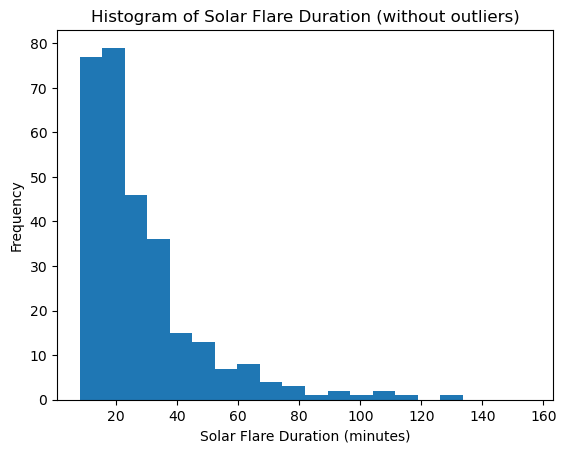

In [68]:
# Calculate the range of solar flare duration without outliers
lower_bound = flr_df['duration'].quantile(0.01)
upper_bound = flr_df['duration'].quantile(0.99)

# Create a histogram of the solar flare duration without outliers
plt.hist(flr_df['duration'], bins=20, range=(lower_bound, upper_bound))
plt.xlabel('Solar Flare Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Solar Flare Duration (without outliers)')
plt.show()


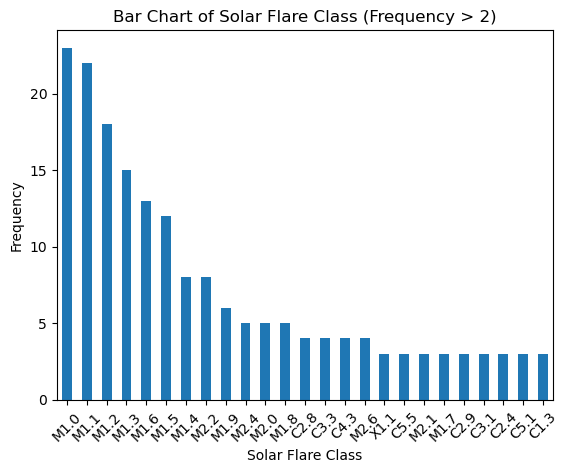

In [69]:
# Filter the DataFrame to include only rows with 'classType' values that occur more than 2 times
class_counts = flr_df['classType'].value_counts()
class_counts_filtered = class_counts[class_counts > 2]

# Create a bar chart of the filtered classType
class_counts_filtered.plot(kind='bar', rot=45)
plt.xlabel('Solar Flare Class')
plt.ylabel('Frequency')
plt.title('Bar Chart of Solar Flare Class (Frequency > 2)')
plt.show()


Mean CME Speed: 564.281677301732
Maximum CME Speed: 2127.0
Minimum CME Speed: 134.0


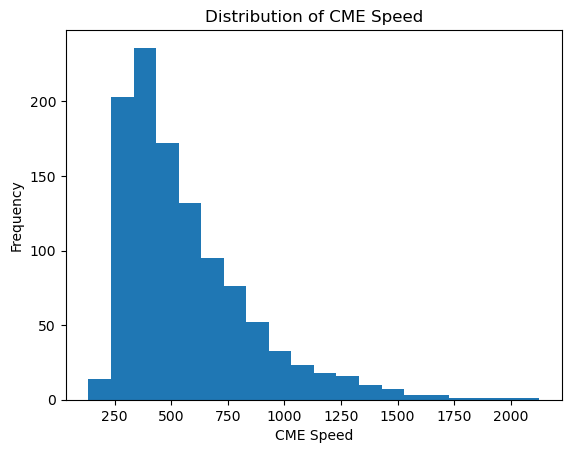

In [67]:
# Perform numeric analysis on CME data
cme_df = data_frames['CMEAnalysis']  # Retrieve the CME DataFrame from the data_frames dictionary
cme_speed_mean = cme_df['speed'].mean()
cme_speed_max = cme_df['speed'].max()
cme_speed_min = cme_df['speed'].min()

# Print the analysis results
print('Mean CME Speed:', cme_speed_mean)
print('Maximum CME Speed:', cme_speed_max)
print('Minimum CME Speed:', cme_speed_min)

# Plot the CME speed distribution
plt.hist(cme_df['speed'], bins=20)
plt.xlabel('CME Speed')
plt.ylabel('Frequency')
plt.title('Distribution of CME Speed')
plt.show()

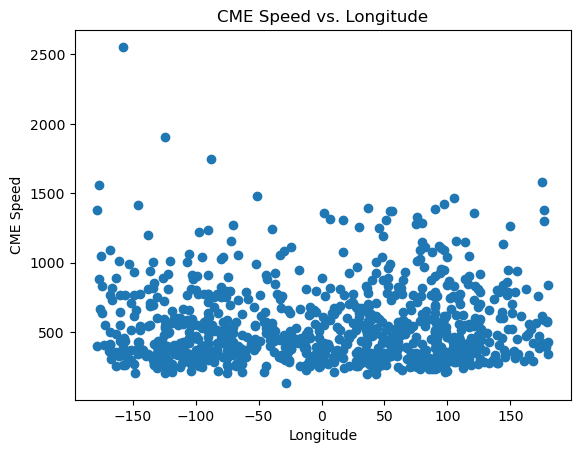

In [26]:
# Create a scatter plot of CME speed vs. longitude
plt.scatter(cme_df['longitude'], cme_df['speed'])
plt.xlabel('Longitude')
plt.ylabel('CME Speed')
plt.title('CME Speed vs. Longitude')
plt.show()

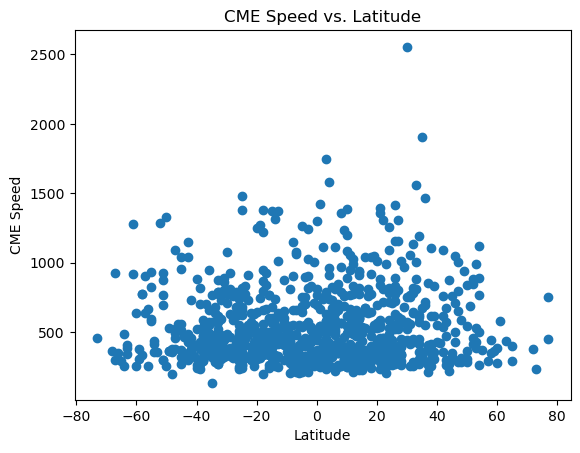

In [27]:
# Create a scatter plot of CME speed vs. Latitude
plt.scatter(cme_df['latitude'], cme_df['speed'])
plt.xlabel('Latitude')
plt.ylabel('CME Speed')
plt.title('CME Speed vs. Latitude')
plt.show()

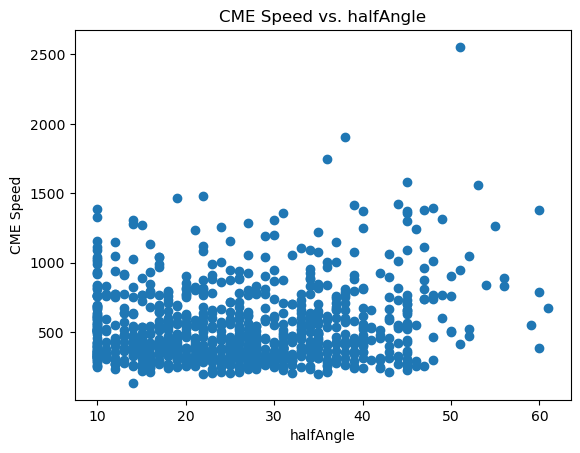

In [28]:
# Create a scatter plot of CME speed vs. Half Angle
plt.scatter(cme_df['halfAngle'], cme_df['speed'])
plt.xlabel('halfAngle')
plt.ylabel('CME Speed')
plt.title('CME Speed vs. halfAngle')
plt.show()